## SHAP Framework

Shap Framework is one of XAI tools that can interpret how our model make a particular prediction. Often times, the complex the models, the hardest the model to interpret. Hence, SHAP Framework works as surrogate model to interpret the complex models. Shap can do local and global interpretability to interpret the model predictions.

Local Interpretability and global interpretability helps machine learning tool to detect whether the features are positively or negatively correlating to the model prediction. Local Interpretability is a condition when we analyze each features on a particular data instances while global interpretability consists of the holistic features. It is like checking how the model make some specific predictions based on the general data that we have. 

On this kernel,we will be looking at one of XAI tools that we can use to interpret model called SHAP framework. I find this tool is having a nice visualization and features that can explain how each features correlate to target outcome and how we can also make local interpretability and global interpretability visualization on the data. On this dataset, i just do a few preprocess and feature engineering on the data because our main focus is to implement SHAP on the model prediction. It is recommended to do a proper feature engineering, Cross Validation, feature selection, hyperparameter tuning in order to get better prediction based on the defined metric on our classification problem.

In [29]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder # For transforming categories to integer labels

In [2]:
df =pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df[:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dropping all irrelevant columns
df.drop(columns=['customerID'], inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Ensuring that TotalCharges is of type object and float 
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [5]:
# Dropping missing values
df.dropna(inplace=True)
df.shape

(7032, 20)

In [6]:
# Label Encoding features 
categorical_feat =list(df.select_dtypes(include=["object"]))

# Using label encoder to transform string categories to integer labels
le = LabelEncoder()
for feat in categorical_feat:
    df[feat] = le.fit_transform(df[feat]).astype('int')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Training the model

In [7]:
features = df.drop(columns=['Churn'])
labels = df['Churn']
# Dividing the data into training-test set with 80:20 split ratio
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2, random_state=123)

In [9]:
model = XGBClassifier(n_estimators = 50, random_state = 42)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [10]:
model.score(x_test, y_test)

0.7924662402274343

The coefficient of determination (R2 coefficient) is around 0.8. The scores indicate that we do have a good ML model. 

## Get Shap Values

In [11]:
import shap
print(f"Shap version used: {shap.__version__}")

Shap version used: 0.41.0


In [12]:
explainer = shap.Explainer(model)
shap_values = explainer(x_test)

## Global interpretability with feature importance

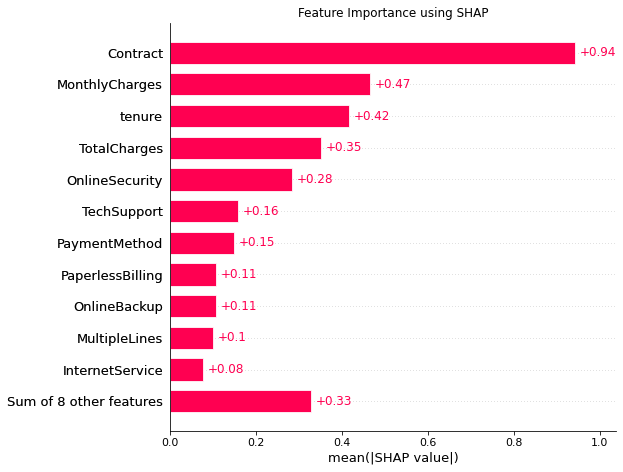

In [15]:
plt.title('Feature Importance using SHAP')
shap.plots.bar(shap_values, show=True, max_display=12)

## Global interpretability with heatmap plots

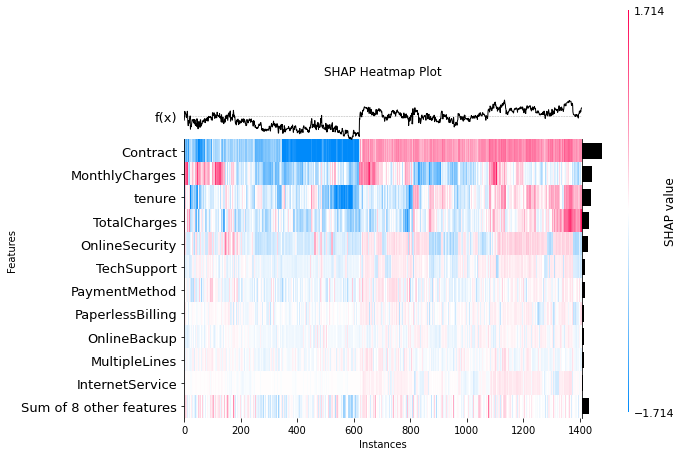

In [16]:
plt.title('SHAP Heatmap Plot')
shap.plots.heatmap(shap_values, max_display=12, show=False)
plt.gcf().axes[-1].set_box_aspect(100)
plt.ylabel('Features')
plt.show()

The heatmaps shows the impact of all features on the model. We can see the Contract feature shows the higher of Contract will also increase tenure and TotalCharges on the red region. The f(x) curve on the top shows how the predicted Churn with the increase of data instances. We can also see the Churn predictions influence the increase of the data instances.

20it [00:52,  4.02s/it]                        


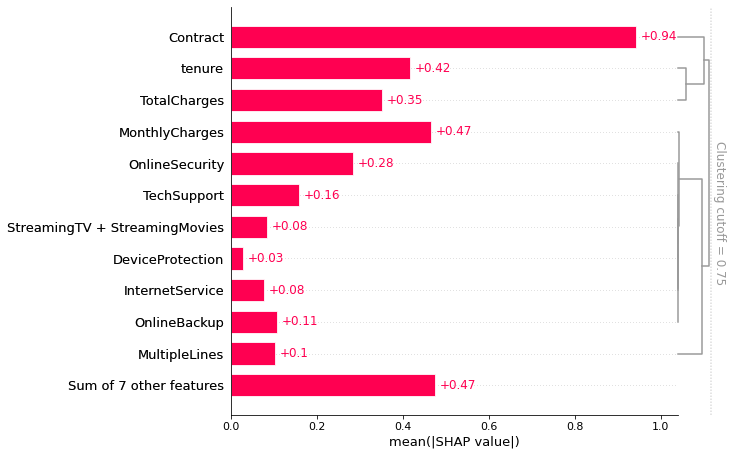

In [18]:
clustering = shap.utils.hclust(x_test, y_test)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.75, max_display = 12)

This clustering features tenure and TotalCharges forms a group and OnlineSecurity and Multiplines forms another group. This process then called hierarchical clustering. This graph also shows how a few features has some interaction based on the subgroup and it could be a feature that we can detect in our EDA for further analysis.

## Global interpretability with SHAP summary plots

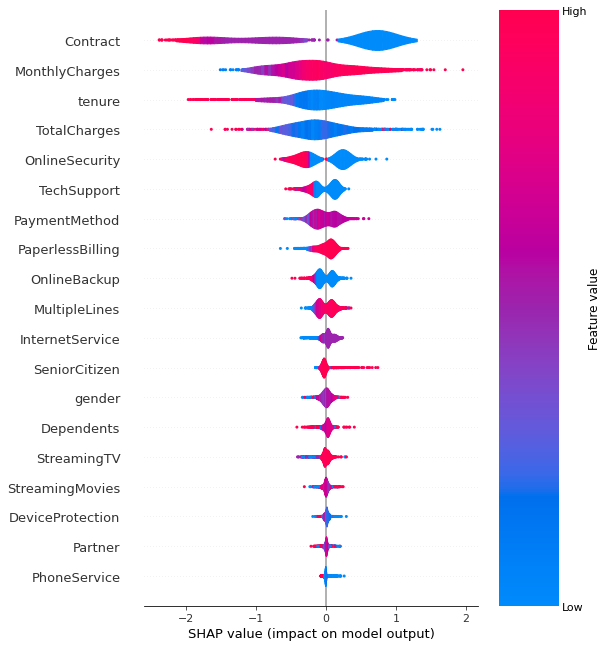

In [19]:
shap.summary_plot(shap_values, x_test, plot_type="violin", show=False)
plt.gcf().axes[-1].set_box_aspect(10)
plt.show()

The violin plots shows the positive or negative impact of the feature for some data points. TotalCharges shows the positive correlation with the target outcome because of the red color gradient.However, it differs with Contract, tenure, and TotalCharges in which low values indicate churn.

## Global interpretability with feature dependence plot

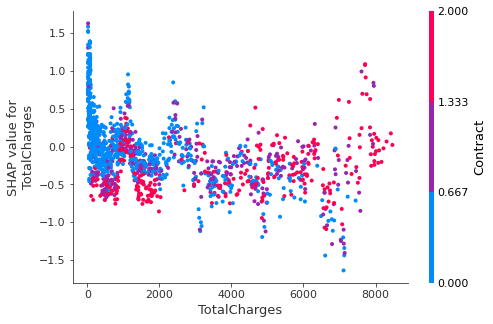

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.dependence_plot("TotalCharges", shap_values, x_test, show=False)
plt.gcf().axes[-1].set_box_aspect(50)

Feature independence plots is like a scatterplot where we can look at the correlation of two variables. From the visualization show the increase of TotalCharges will increase the Contract as well.

## Local interpretability with force plot

In [21]:
# Initialization of javascript visualization in notebooks
shap.initjs()

In [22]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:], plot_cmap="PkYg")

f(x) shows the model prediction outcome. The base value is the the mean value predicted by the model. The pink and green region shows how the features correlate to the target outcome. We can see how contract,montlycharges will make the model outcome to a lower value and PaperlessBilling will make the outcome bigger. When we have a lot of features, it is really difficult to interpret using this visualization. 

## Local interpretability using Waterfall plots

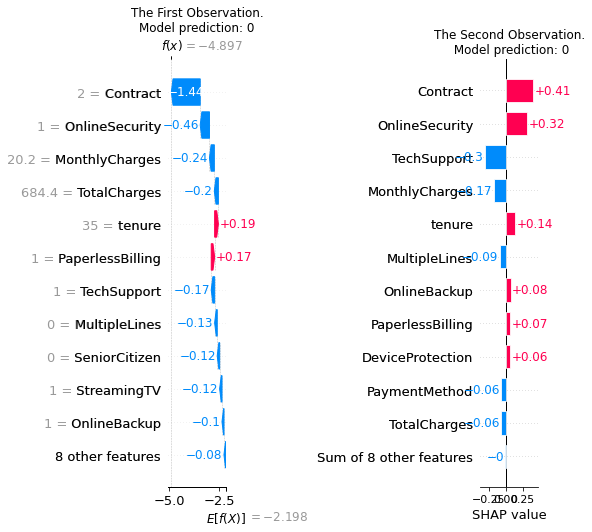

In [23]:
figure = plt.figure(figsize=(25,12))
ax1 = figure.add_subplot(121)

explainer = shap.Explainer(model, x_test)
shap_values = explainer(x_test)
# For the test observation with index 0
shap.plots.waterfall(shap_values[0], max_display = 12, show=False)
ax1.title.set_text(f'The First Observation.\nModel prediction: {model.predict(x_test)[0]}')

ax2 = figure.add_subplot(122)
# Similarly for the test observation with index 1
shap.plots.bar(shap_values[1], max_display = 12, show=False) 
ax2.title.set_text(f'The Second Observation.\n Model prediction: {model.predict(x_test)[1]}')
plt.tight_layout()
plt.show()

we can see from an inference of data instance towards the features on the first and second observation shows different result in which on the first observation, the contract feature contributes negatively towards the model prediction while on the second one,the contract feature contributes positively towards the model prediction.

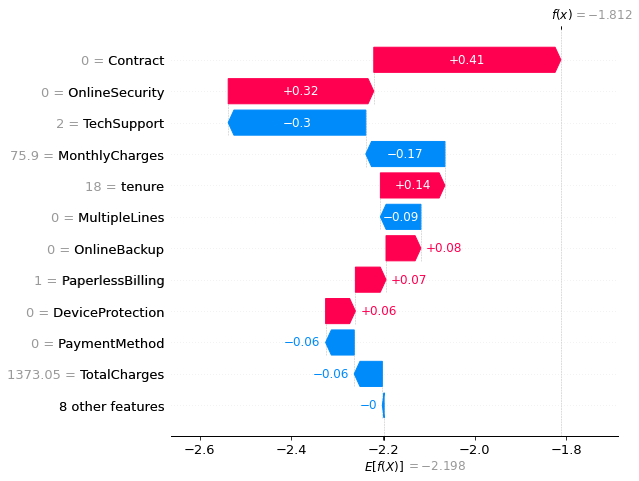

In [24]:
shap.plots.waterfall(shap_values[1], max_display = 12) 

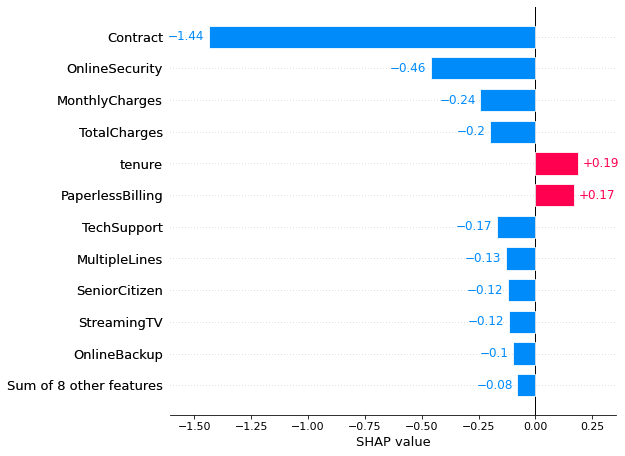

In [25]:
shap.plots.bar(shap_values[0], max_display = 12)

## Local interpretability with decision plot

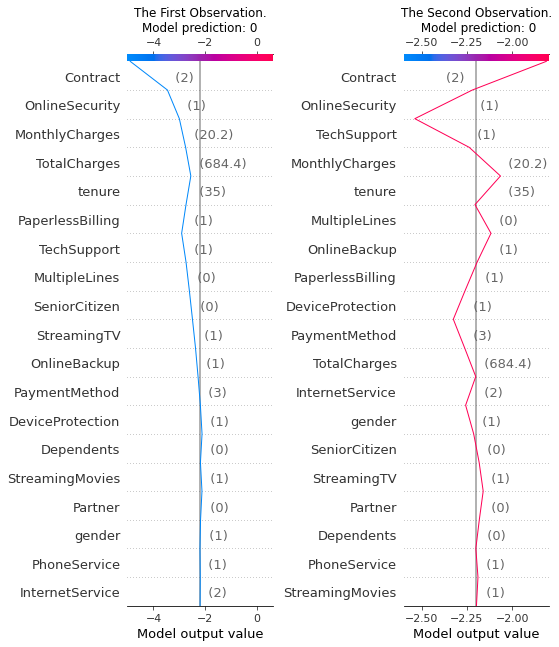

In [26]:
expected_value = explainer.expected_value
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(121)
shap_values = explainer.shap_values(x_test)[0]
shap.decision_plot(expected_value, shap_values, x_test, show=False)
ax1.title.set_text(f'The First Observation.\nModel prediction: {model.predict(x_test)[0]}')

ax2 = figure.add_subplot(122)
shap_values = explainer.shap_values(x_test)[1]
shap.decision_plot(expected_value, shap_values, x_test, show=False)
ax2.title.set_text(f'The Second Observation.\n Model prediction: {model.predict(x_test)[1]}')
plt.tight_layout()
plt.show()

Decision plots helps the interpretability to handle many features in our dataset to interpret. We can see from the preceding plots how each current local predictionis are higher or lower than the average predicted outcome and how the value on the features is affecting the model outcome. In the two examples shown, the cases the features contract to TechSupport are negatively impacting the modelw while most features on the second observation are positively impacting the model prediction.